# ECE 435/535 Lab 6: Support Vector Machines

### Name: Amir Reza Vazifeh

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score

%matplotlib inline

In [2]:
# The following code is provided for use in this HW
# It generates nx labelled examples from each of two bi-variate Gaussian densities.
#----------------------------------------------------------------------------------
def multinormaldata(nx, mu1, cov1, mu2, cov2):
    D = np.zeros((2*nx,2), float)
    D[0:nx,:] = np.random.multivariate_normal(mu1, cov1, nx)
    D[nx:2*nx,:] = np.random.multivariate_normal(mu2, cov2, nx)
    y = np.ones(2*nx, int)
    y[nx:] = -np.ones(nx)
    return D, y

## 1. Linear Support Vector Machine

**1.1) Generate a total of 100 samples from two 2D Gaussian densities.**  
a) Let $\mu_1 = (1,1)$ and $\mu_2 = (-1, -1)$ and $\Sigma_1 = \Sigma_2 = I_2$.  
b) Store the samples in a data matrix $X$ and labels in a vector $y$.    
c) Plot the labelled points in the 2D plane. Use color coding and marker shape to distinguish the two labels.

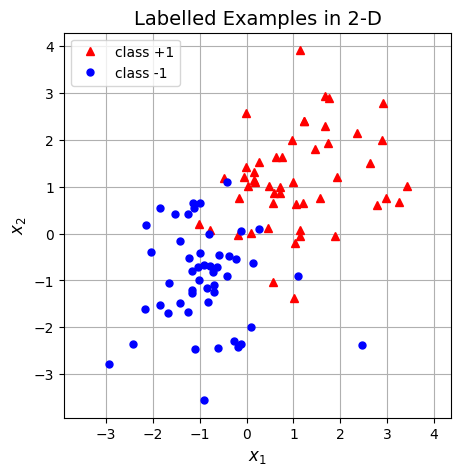

In [3]:
# Generate a binary class dataset
# This code is given to you

np.random.seed(220606)

nx  = 50
mu1 = np.array([1.,1.])
cov1 = np.eye(2)
mu2 = -mu1
cov2 = np.eye(2)

X, Y = multinormaldata(nx, mu1, cov1, mu2, cov2)

plt.figure(figsize=(5,5))
plt.plot(X[:nx,0],X[:nx,1], '^r', markersize=6, linestyle='none', label='class +1')
plt.plot(X[nx:,0],X[nx:,1], 'ob', markersize=5, linestyle='none', label='class -1')
plt.ylabel('$x_2$', fontsize=12)
plt.xlabel('$x_1$', fontsize=12)
plt.title('Labelled Examples in 2-D',fontsize=14)
plt.legend(loc='upper left')
plt.axis([-6, 6, -6, 6])
plt.axis('equal')
plt.grid(True)
plt.show()

**1.2) Train a linear support vector machine on the generated data using $C=1$.**  
a) Plot the separating hyperplane (a line) that separates the two classes (use a solid line).  
b) Plot the two hyperlanes $w^\top x +b = \pm 1$ (use dashed lines).  
c) Mark the support vectors using a circle around each one.

**Note:** Use scikit-learn SVC. When you use SVC, make sure you specify a linear kernel by SVC(kernel='linear'...).

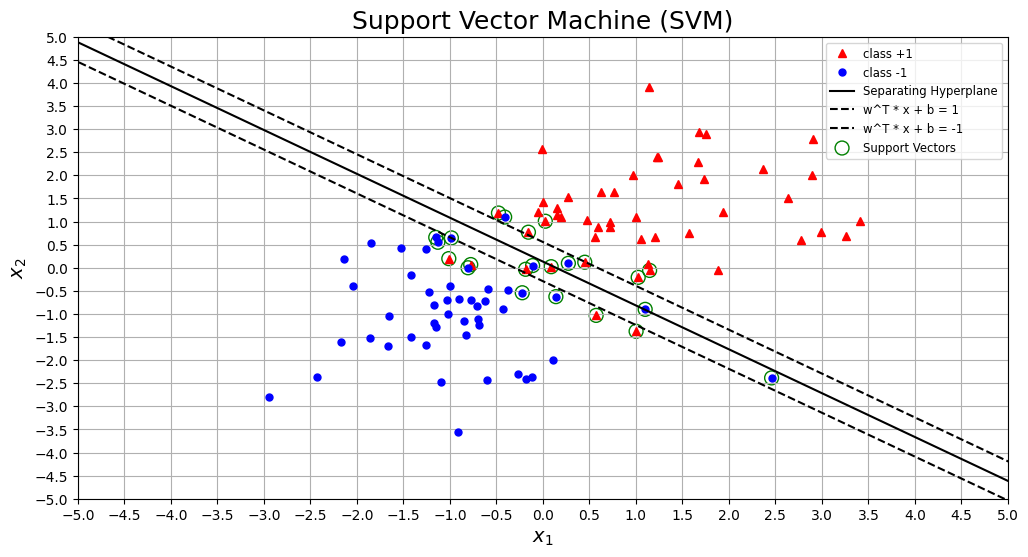

In [4]:
#-------------------------
# This code is given to you
penalty = 1
svm_classifier = svm.SVC(kernel='linear',C=penalty)
svm_classifier.fit(X,Y)
w = svm_classifier.coef_[0]
b = svm_classifier.intercept_[0]
support_vector = svm_classifier.support_vectors_
#-------------------------

# Plot the data points
plt.figure(figsize=(12,6))
plt.plot(X[:nx, 0], X[:nx, 1], '^r', markersize=6, linestyle='none', label='class +1')
plt.plot(X[nx:, 0], X[nx:, 1], 'ob', markersize=5, linestyle='none', label='class -1')

# Plot the separating hyperplane
x_hyperplane = np.linspace(-6, 6, 100)
y_hyperplane = (-w[0] * x_hyperplane - b) / w[1]
plt.plot(x_hyperplane, y_hyperplane, 'k-', label='Separating Hyperplane')

# Plot the two hyperlanes w^T * x + b = ±1
margin = 1 / np.linalg.norm(w)
y_hyperplane_upper = y_hyperplane + margin / np.linalg.norm(w)
y_hyperplane_lower = y_hyperplane - margin / np.linalg.norm(w)
plt.plot(x_hyperplane, y_hyperplane_upper, 'k--', label='w^T * x + b = 1')
plt.plot(x_hyperplane, y_hyperplane_lower, 'k--', label='w^T * x + b = -1')

# Mark the support vectors
plt.scatter(support_vector[:, 0], support_vector[:, 1], s=100, facecolors='none', edgecolors='g', label='Support Vectors')

plt.ylabel('$x_2$', fontsize=14)
plt.xlabel('$x_1$', fontsize=14)
plt.title('Support Vector Machine (SVM)', fontsize=18)
plt.legend(loc='upper right', fontsize='small')
plt.grid()

# Set the x-ticks from -5 to 5 with a step of 0.5
plt.xticks(np.arange(-5, 5.01, 0.5))

# Set the x-axis limits to -5 and 5
plt.xlim(-5, 5)

# Set the y-ticks from -5 to 5 with a step of 0.5
plt.yticks(np.arange(-5, 5.01, 0.5))

# Set the y-axis limits to -5 and 5
plt.ylim(-5, 5)
plt.show()

**1.3) Repeat 1.2) using a set of values of $C$ ($10^{-3}$ ~$10^2$).**  
a) Do the same plot as 1.2) for each value of log(C), but leave out the $\pm 1$ hyperplanes (use subplot).  

b) On a separate plot, plot $\|w\|^2$ versus $log(C)$ as $log(C)$ varies over the above interval.  

c) Similarly, plot the number of support vectors vs. $log(C)$.

d) How does $\|w\|^2$ change as the value of $C$ increases? Why does it change in that way?

e) How does the number of support vectors change as $C$ increases? Why does it change in that way?


ANS: The primal linear SVM probelm can be written as

minimize $\frac{1}{2}\|w\|_2 + C\sum{s_j}$

s.t $\hspace{1mm}$ $y_j(x_j^T w + b) + s_j ≥ 1$ for all $j ∈ [1:m]$,
and $\hspace{1mm}$ $s_j ≥ 0$ for all $j ∈ [1:m]$,




d) In SVM optimization, the choice of the regularization parameter, C, plays a crucial role in determining the trade-off between maximizing the margin and minimizing classification errors. **A small value of C prioritizes a wider margin (larger $\frac{1}{\|w\|_2}$ i.e. smaller $\|w\|_2$) and focuses on simplicity, allowing for some misclassification errors. Conversely, a larger C emphasizes the reduction of classification errors, resulting in a narrower margin (smaller $\frac{1}{\|w\|_2}$ i.e. larger $\|w\|_2$) and a more complex decision boundary, with fewer points misclassified or falling within the margin.** The value of C thus determines the balance between margin width and classification accuracy in SVM.

e) **As it is shown below, "the number of support vectors decreases as $C$ increases. Larger values of C correspond to a more "strict" or "hard-margin" SVM, where the SVM is less tolerant of misclassifications. In this case, the SVM is more likely to choose support vectors that are closer to the separating hyperplane, resulting in fewer support vectors.** Smaller values of C correspond to a "soft-margin" SVM, which allows for more support vectors, even if they are not as close to the margin, to account for potential misclassifications.

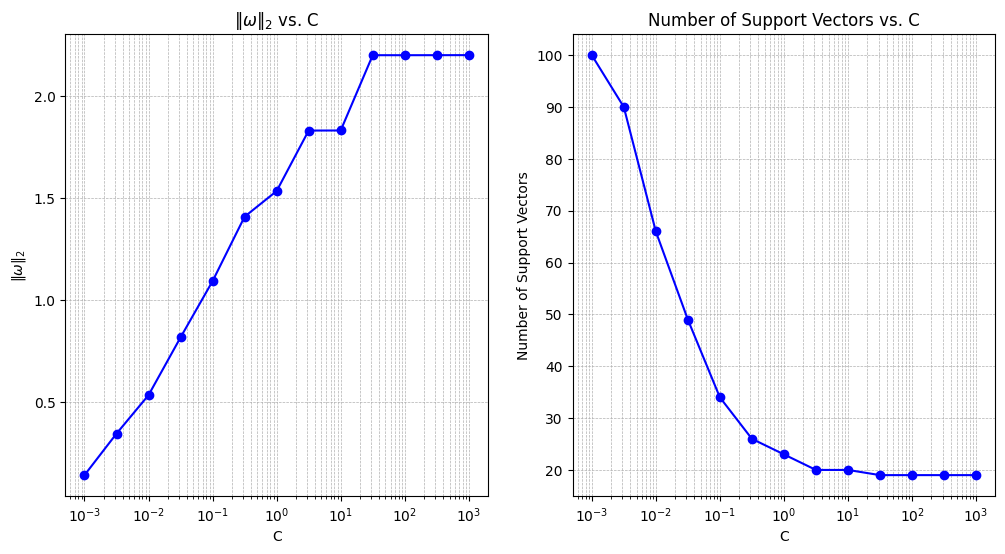

In [5]:
# Create a range of values for log(C)
log_C_values = np.arange(-3, 3.5, 0.5)
C_values = 10 ** log_C_values

# Initialize arrays to store results
norm_w_values = []
num_support_vectors = []

# Iterate over each value of C
for C in C_values:
    # Train a linear support vector machine with the current value of C
    svm_classifier = svm.SVC(kernel='linear', C=C)
    svm_classifier.fit(X, Y)
    w = svm_classifier.coef_[0]
    support_vector = svm_classifier.support_vectors_

    # Append results to arrays
    norm_w_values.append(np.linalg.norm(w))
    num_support_vectors.append(len(support_vector))

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot norm of w versus log(C)
axes[0].semilogx(C_values, norm_w_values, marker='o', linestyle='-', color='blue')
axes[0].set_title('$‖\omega‖_2$ vs. C')
axes[0].set_xlabel('C')
axes[0].set_ylabel('$‖\omega‖_2$')
axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)


# Plot the number of support vectors versus log(C)
axes[1].semilogx(C_values, num_support_vectors, marker='o', linestyle='-', color='blue')
axes[1].set_title('Number of Support Vectors vs. C')
axes[1].set_xlabel('C')
axes[1].set_ylabel('Number of Support Vectors')
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

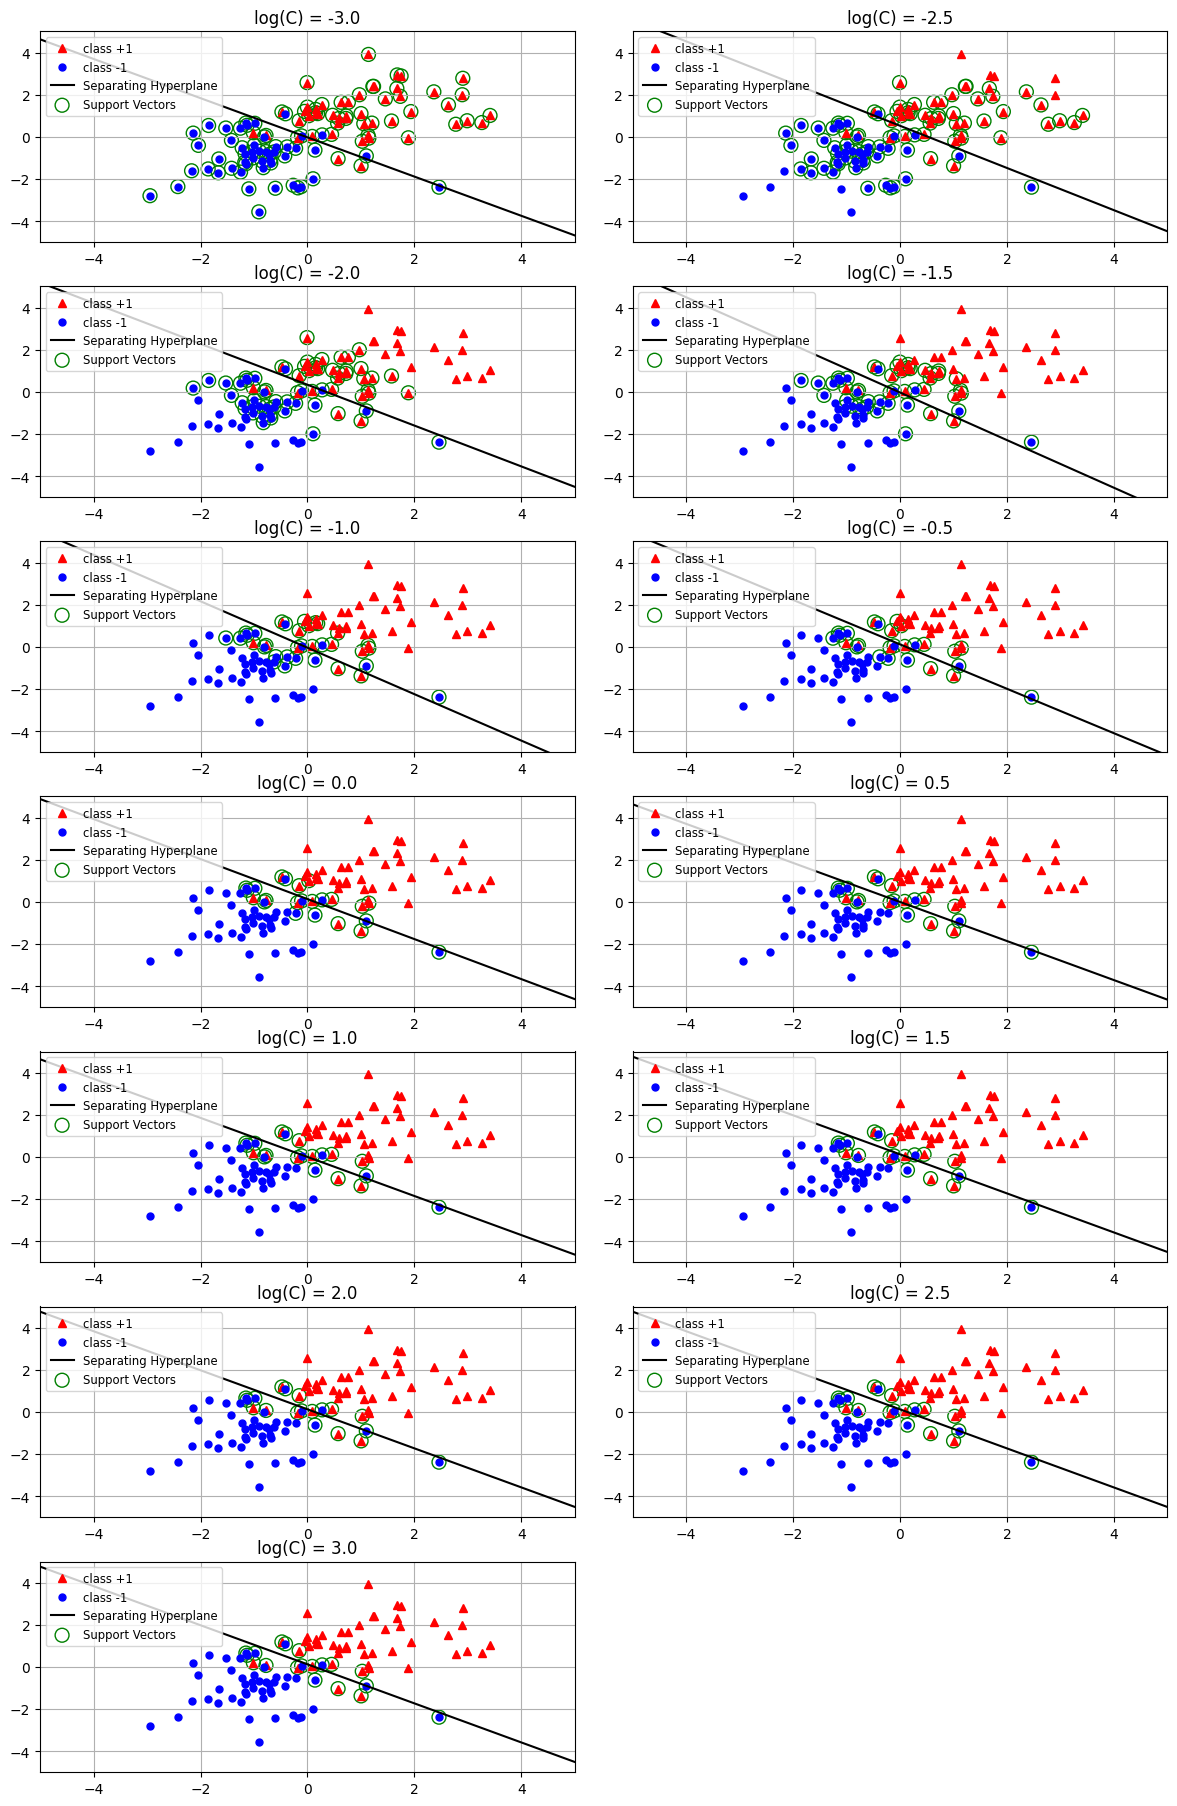

In [6]:
# Define the number of rows and columns for subplots
num_rows = 7
num_columns = 2
total_subplots = num_rows * num_columns

# Create a new figure with subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(12, 18))
fig.tight_layout()

for i, C in enumerate(C_values):

    # Calculate the subplot position
    row = i // num_columns
    col = i % num_columns

    svm_classifier = svm.SVC(kernel='linear', C=C)
    svm_classifier.fit(X, Y)
    w = svm_classifier.coef_[0]
    b = svm_classifier.intercept_[0]
    support_vector = svm_classifier.support_vectors_

    x_plot = np.linspace(-10, 10, 100)
    y_plot = (-w[0] * x_plot - b) / w[1]

    # Select the current subplot
    ax = axes[row, col]

    # Plot data, hyperplane, and support vectors in the current subplot
    ax.plot(X[:nx, 0], X[:nx, 1], '^r', markersize=6, linestyle='none', label='class +1')
    ax.plot(X[nx:, 0], X[nx:, 1], 'ob', markersize=5, linestyle='none', label='class -1')
    ax.plot(x_plot, y_plot, 'k-', label='Separating Hyperplane')
    ax.scatter(support_vector[:, 0], support_vector[:, 1], s=100, facecolors='none', edgecolors='g', label='Support Vectors')
    ax.set_title(f'log(C) = {log_C_values[i]}')
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.grid()
    ax.legend(fontsize='small', loc='upper left')

# Remove any empty subplots
fig.delaxes(axes[6, 1])

plt.show()


## 2. SVM with Linear and Quadratic Kernels

**2.1) Generate Data**  
(a) Generate data as specified below.  
(b) Plot the data, use a distinct color and marker shape for each class.  
(c) Estimate the expected classification accuracy of a linear classifier (give your reasoning)

ANS: In binary classification with an equal number of examples per class, the worst accuracy would occur when the classifier predicts all examples in one class as the other class. In this case, the worst accuracy is 50%, which is equivalent to random guessing. Because the dataset lacks linear separability greatly, we can expect accuracy between 55% to 65% using linear SVM. However, by changing the kernel, we can reach greater accuracy.

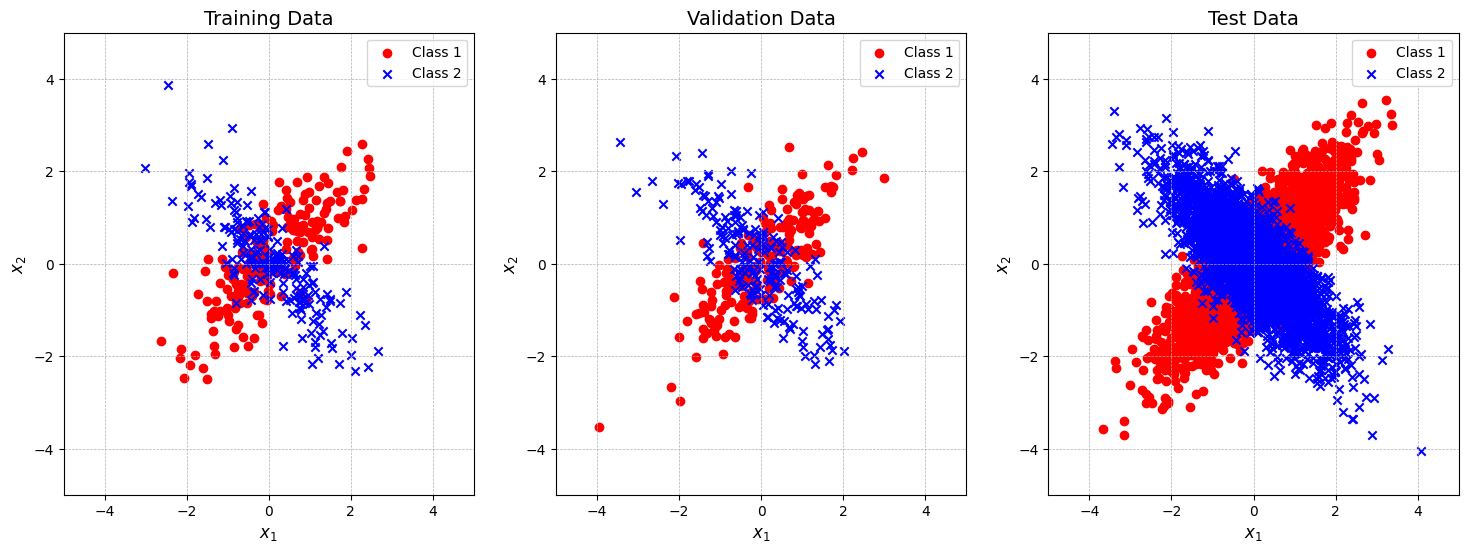

In [7]:
# Generate Training, Validation, and Testing Data
np.random.seed(31415926)
# generate data from two classes:
# first class mean1 = (0,0), Cov1 ~ sigma1 =1, sigma2=1, and correlation rho=0.8
# second class mean2 = (0,0), Cov2 ~ sigma1 =1, sigma2=1, and correlation rho=-0.8

# generate 200 examples per class of training data and labels
# generate 200 examples per class of validation data and labels
# generate 3000 examples per class of testing data and labels
#----------------------------------------------------------------------------------

# Specify first Gaussian
mu1 = [0.0, 0.0]
sig11 = 1.0
sig12 = 1.0
rho1 = 0.8
cov1 = np.array([[sig11*sig11, sig11*sig12*rho1], [sig11*sig12*rho1, sig12*sig12]])

# Specify second Gaussian
mu2 = [0.0, 0.0]
sig21 = 1.0
sig22 = 1.0
rho2 = -0.8
cov2 = np.array([[sig21*sig21, sig21*sig22*rho2], [sig21*sig22*rho2, sig22*sig22]])

# Generate training data
n_train = 200
X_train_class1 = np.random.multivariate_normal(mu1, cov1, n_train)
X_train_class2 = np.random.multivariate_normal(mu2, cov2, n_train)
y_train_class1 = np.ones(n_train)
y_train_class2 = -np.ones(n_train)

# Generate validation data
n_validation = 200
X_validation_class1 = np.random.multivariate_normal(mu1, cov1, n_validation)
X_validation_class2 = np.random.multivariate_normal(mu2, cov2, n_validation)
y_validation_class1 = np.ones(n_validation)
y_validation_class2 = -np.ones(n_validation)

# Generate test examples
n_test = 3000
X_test_class1 = np.random.multivariate_normal(mu1, cov1, n_test)
X_test_class2 = np.random.multivariate_normal(mu2, cov2, n_test)
y_test_class1 = np.ones(n_test)
y_test_class2 = -np.ones(n_test)

# Combine the data from both classes
X_train = np.vstack((X_train_class1, X_train_class2))
y_train = np.hstack((y_train_class1, y_train_class2))

X_validation = np.vstack((X_validation_class1, X_validation_class2))
y_validation = np.hstack((y_validation_class1, y_validation_class2))

X_test = np.vstack((X_test_class1, X_test_class2))
y_test = np.hstack((y_test_class1, y_test_class2))

# Plot the training data
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))


#axes[0].figure(figsize=(6, 4))
axes[0].scatter(X_train_class1[:, 0], X_train_class1[:, 1], c='red', marker='o', label='Class 1')
axes[0].scatter(X_train_class2[:, 0], X_train_class2[:, 1], c='blue', marker='x', label='Class 2')
axes[0].set_xlabel('$x_1$', fontsize=12)
axes[0].set_ylabel('$x_2$', fontsize=12)
axes[0].set_title('Training Data', fontsize=14)
axes[0].legend(loc='upper right')
axes[0].set_xlim([-5, 5])
axes[0].set_ylim([-5, 5])
axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)

axes[1].scatter(X_validation_class1[:, 0], X_validation_class1[:, 1], c='red', marker='o', label='Class 1')
axes[1].scatter(X_validation_class2[:, 0], X_validation_class2[:, 1], c='blue', marker='x', label='Class 2')
axes[1].set_xlabel('$x_1$', fontsize=12)
axes[1].set_ylabel('$x_2$', fontsize=12)
axes[1].set_title('Validation Data', fontsize=14)
axes[1].legend(loc='upper right')
axes[1].set_xlim([-5, 5])
axes[1].set_ylim([-5, 5])
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)

axes[2].scatter(X_test_class1[:, 0], X_test_class1[:, 1], c='red', marker='o', label='Class 1')
axes[2].scatter(X_test_class2[:, 0], X_test_class2[:, 1], c='blue', marker='x', label='Class 2')
axes[2].set_xlabel('$x_1$', fontsize=12)
axes[2].set_ylabel('$x_2$', fontsize=12)
axes[2].set_title('Test Data', fontsize=14)
axes[2].legend(loc='upper right')
axes[2].set_xlim([-5, 5])
axes[2].set_ylim([-5, 5])
axes[2].grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

**2.2) Train a Linear SVM classifier**

(a) Train over values of $log(C)$ from -3 to 3 in steps of 1.  
(b) Plot the resulting training and validation accuracies.  
(c) Use the plot from part (b) to select a value of $C$. Justify your choice.  

ANS: It seems that $C = 10$ can be a good choice, as it has the largest validation accuracy.

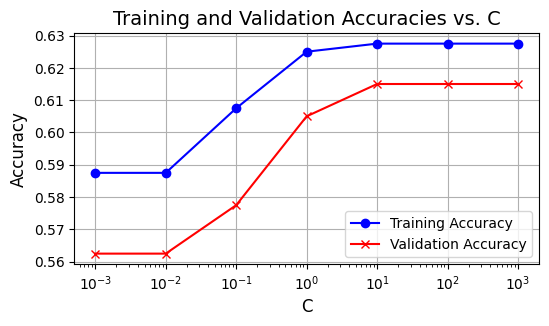

In [8]:
# Train a linear SVM Classifier
# Specify a range of C values
log_C_values = np.arange(-3, 4, 1.0)
C_values = 10 ** log_C_values

# Initialize arrays to store results
training_accuracies = []
validation_accuracies = []

for C in C_values:
    # Train a linear SVM classifier with the current value of C
    svm_classifier = svm.SVC(kernel='linear', C=C)
    svm_classifier.fit(X_train, y_train)

    # Predict on training and validation sets
    y_train_pred = svm_classifier.predict(X_train)
    y_validation_pred = svm_classifier.predict(X_validation)

    # Calculate accuracies and append to arrays
    training_accuracy = accuracy_score(y_train, y_train_pred)
    validation_accuracy = accuracy_score(y_validation, y_validation_pred)

    training_accuracies.append(training_accuracy)
    validation_accuracies.append(validation_accuracy)

# Plot the resulting training and validation accuracies
plt.figure(figsize=(6, 3))
plt.semilogx(C_values, training_accuracies, marker='o', label='Training Accuracy', color='blue')
plt.semilogx(C_values, validation_accuracies, marker='x', label='Validation Accuracy', color='red')
plt.xlabel('C', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Training and Validation Accuracies vs. C', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

**2.3) Use the selected value of $C$ to train a Linear SVM**   
(a) Use all of the training and validation data for training.  
(b) Plot the data, the SVM hyperplane, and the +1 and -1 hyperplanes. Circle the support vectors.   
(c) What is the classification accuracy?  Classification accuracy on the mixture of training and validation Data is 61.88%. Classification accuracy on testing data is 60.17%.

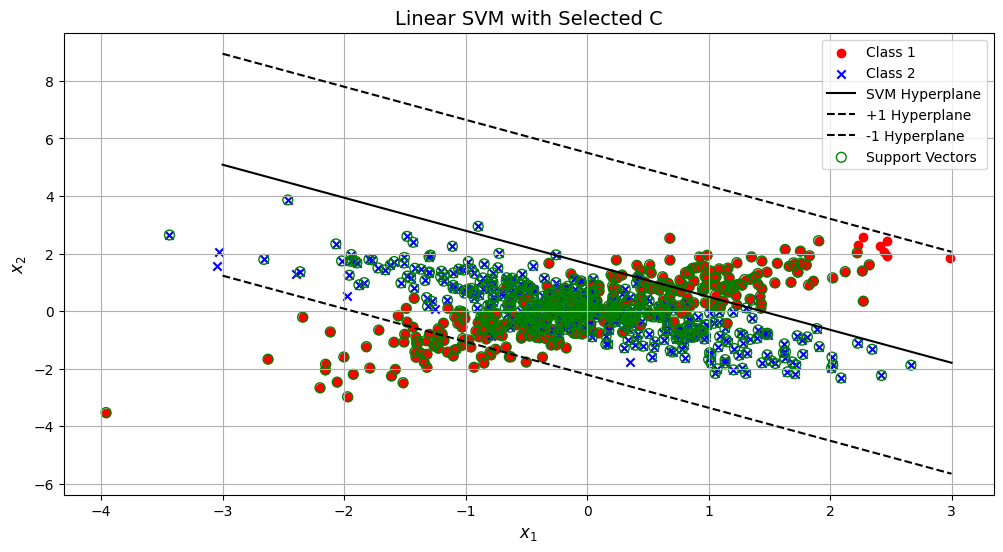

Classification Accuracy on Mixture of Training and Validation Data: 61.88%
Classification Accuracy on Testing Data: 60.17%


In [9]:
# Selected value of C
selected_C = 10

# Train a Linear SVM with the selected C using all training and validation data
svm_classifier = svm.SVC(kernel='linear', C=selected_C)
X_train_validation = np.vstack((X_train, X_validation))
y_train_validation = np.hstack((y_train, y_validation))
svm_classifier.fit(X_train_validation, y_train_validation)

# Plot the data, SVM hyperplane, +1 and -1 hyperplanes, and circle the support vectors
plt.figure(figsize=(12, 6))

plt.scatter(X_train_class1[:, 0], X_train_class1[:, 1], c='red', marker='o', label='Class 1')
plt.scatter(X_train_class2[:, 0], X_train_class2[:, 1], c='blue', marker='x', label='Class 2')
plt.scatter(X_validation_class1[:, 0], X_validation_class1[:, 1], c='red', marker='o')
plt.scatter(X_validation_class2[:, 0], X_validation_class2[:, 1], c='blue', marker='x')

# Plot the separating hyperplane
w = svm_classifier.coef_[0]
b = svm_classifier.intercept_[0]
x_hyperplane = np.linspace(-3, 3, 100)
y_hyperplane = (-w[0] * x_hyperplane - b) / w[1]
plt.plot(x_hyperplane, y_hyperplane, 'k-', label='SVM Hyperplane')

# Plot the +1 and -1 hyperplanes
margin = 1 / np.linalg.norm(w)
y_hyperplane_upper = y_hyperplane + margin / np.linalg.norm(w)
y_hyperplane_lower = y_hyperplane - margin / np.linalg.norm(w)
plt.plot(x_hyperplane, y_hyperplane_upper, 'k--', label='+1 Hyperplane')
plt.plot(x_hyperplane, y_hyperplane_lower, 'k--', label='-1 Hyperplane')

# Mark the support vectors
support_vectors = svm_classifier.support_vectors_
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=50, facecolors='none', edgecolors='g', label='Support Vectors')

plt.xlabel('$x_1$', fontsize=12)
plt.ylabel('$x_2$', fontsize=12)
plt.title('Linear SVM with Selected C', fontsize=14)
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Predict on the testing data and calculate classification accuracy
y_train_validation_pred = svm_classifier.predict(X_train_validation)
train_validation_accuracy = accuracy_score(y_train_validation, y_train_validation_pred)
y_test_pred = svm_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Classification Accuracy on Mixture of Training and Validation Data: {train_validation_accuracy * 100:.2f}%')
print(f'Classification Accuracy on Testing Data: {test_accuracy * 100:.2f}%')

**2.4) Quadratic kernel SVM**  
(a) Repeat part 2.2), except this time use a quadratic kernel in the SVM. See polynomial kernel option.  
(b) Use the validation curve to select a value of $C$. Record and justify your choice below.

ANS: It seems that $C = 0.1$ can be a good choice, as it has the largest validation accuracy. However, $C = 1$ is also a good choice as it has greater training accuracy and slightly lower validation accuracy.

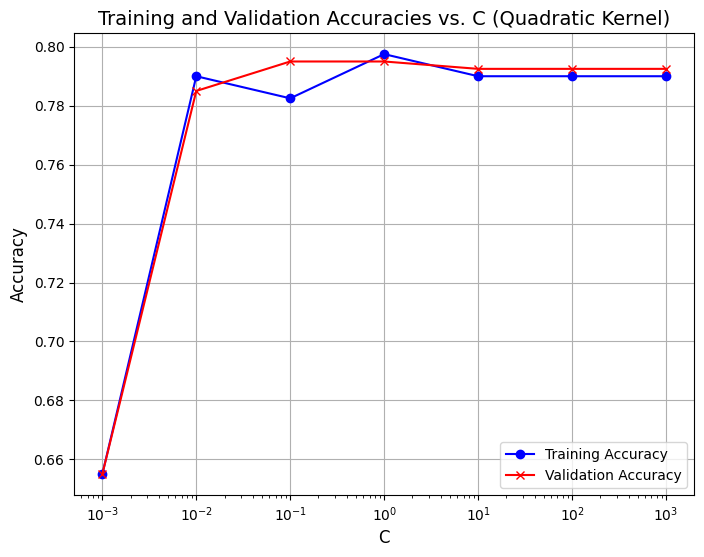

In [10]:
# Train a Quadratic Kernel SVM Classifier

# Specify a range of C values
log_C_values = np.arange(-3, 4, 1.0)
C_values = 10 ** log_C_values

# Initialize arrays to store results
training_accuracies_quad = []
validation_accuracies_quad = []

for C in C_values:

    # Train a Quadratic Kernel SVM (polynomial kernel of degree 2) with the current value of C
    svm_classifier = svm.SVC(kernel='poly', degree=2, C=C)
    svm_classifier.fit(X_train, y_train)

    # Predict on training and validation sets
    y_train_pred = svm_classifier.predict(X_train)
    y_validation_pred = svm_classifier.predict(X_validation)

    # Calculate accuracies and append to arrays
    training_accuracy = accuracy_score(y_train, y_train_pred)
    validation_accuracy = accuracy_score(y_validation, y_validation_pred)

    training_accuracies_quad.append(training_accuracy)
    validation_accuracies_quad.append(validation_accuracy)

# Plot the resulting training and validation accuracies
plt.figure(figsize=(8, 6))
plt.semilogx(C_values, training_accuracies_quad, marker='o', label='Training Accuracy', color='blue')
plt.semilogx(C_values, validation_accuracies_quad, marker='x', label='Validation Accuracy', color='red')
plt.xlabel('C', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Training and Validation Accuracies vs. C (Quadratic Kernel)', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


**2.5) Using the selected value of C to retrain on all Training + Validation Data**  
(a) What is the final training and testing accuracy?  
(b) How does this accuracy compare to that of the Linear SVM?

For quadratic kernel, classification accuracy on the mixture of training and validation data is 79.35%. Classification accuracy on testing data is 79.40%. However, in Linear SVM, classification accuracy on the mixture of training and validation data is 61.88%. Classification accuracy on testing data is 60.17%. There is a considerable improvement in accuracy in the quadratic kernel compared to the liner kernel.

In [11]:
# Your Code Here

# Selected value of C based on the validation curve
selected_C = 0.1

# Combine the training, validation, and testing data
X_train_validation_test = np.vstack((X_train, X_validation, X_test))
y_train_validation_test = np.hstack((y_train, y_validation, y_test))

# Train the SVM with the selected C on all training and validation data
svm_classifier = svm.SVC(kernel='poly', degree=2, C=selected_C)
svm_classifier.fit(X_train_validation_test, y_train_validation_test)

# Predict on the training and testing data
y_train_validation_test_pred = svm_classifier.predict(X_train_validation_test)
y_test_pred = svm_classifier.predict(X_test)

# Calculate final training and testing accuracy
final_training_validation_accuracy = accuracy_score(y_train_validation_test, y_train_validation_test_pred)
final_testing_accuracy = accuracy_score(y_test, y_test_pred)

# Print the final accuracies
print(f'Final Training and Testing Accuracy (Quadratic Kernel SVM):')
print(f'Training + Validation Accuracy: {final_training_validation_accuracy * 100:.2f}%')
print(f'Testing Accuracy: {final_testing_accuracy * 100:.2f}%')

Final Training and Testing Accuracy (Quadratic Kernel SVM):
Training + Validation Accuracy: 79.35%
Testing Accuracy: 79.40%
